In [1]:
scClass_path = !cd ../scClass_modelC;pwd
scClass_path = str(scClass_path.n)
import sys; sys.path.append(scClass_path)
import scClass
from scClass.train import Model

In [2]:
import scanpy as sc
import numpy as np
import pandas as pd

In [3]:
filename_training = "../dataset/PBMC_CITE.h5ad"
adata = sc.read_h5ad(filename_training)
adata

AnnData object with n_obs × n_vars = 161764 × 20729
    obs: 'Phase', 'celltype.l1', 'celltype.l2', 'celltype.l3', 'donor', 'lane', 'nCount_ADT', 'nCount_RNA', 'nCount_SCT', 'nFeature_ADT', 'nFeature_RNA', 'nFeature_SCT', 'orig.ident', 'time', 'modelA id', 'modelC id', 'transfer cell type', 'origin cell type'
    var: 'Gene'

In [4]:
adata = scClass.pp.preprocess(adata,normalize=False)

filter type_id=-1 cell:  161764  -> 154238  cells
shuffling data


In [5]:
# subsmapling
label_tmp = np.array([],dtype=int)
for i in np.unique(adata.obs['modelC id']):
    msum = np.array(adata.X.sum(axis=1)).flatten()
    msum[adata.obs['modelC id']!=i] = -1
    label_tmp = np.append(label_tmp,np.argsort(msum)[::-1][:min((adata.obs['modelC id']==i).sum(),1000)])
adata_sub = adata[label_tmp,:]

In [6]:
unique = np.unique(adata_sub.obs['modelC id'],return_counts=True)
pd.DataFrame(unique)

,0,1,2,3,4,5,6,7,8,9,10
0,0,1,2,3,4,5,6,7,8,9,10
1,1000,1000,1000,1000,366,1000,83,1000,1000,1000,329


In [7]:
adata_sub = scClass.pp.preprocess(adata_sub)

filter type_id=-1 cell:  8778  -> 8778  cells
shuffling data
normalizing data


In [8]:
dataset = scClass.npz_dataloader(matrix=adata_sub.X,label=adata_sub.obs['modelC id'])

loading data, it will take time


In [9]:
model = scClass.Model()

In [10]:
scClass.training(dataset,model)

0 
epoch 0 	| loss:2.95859385 | training accuracy:0.57900000| loss:3.38240862 | validation accuracy:0.52364672
0 
epoch 1 	| loss:1.51005495 | training accuracy:0.62700000| loss:1.55159378 | validation accuracy:0.61310541
0 
epoch 2 	| loss:0.76437622 | training accuracy:0.74500000| loss:0.86908561 | validation accuracy:0.68717949
0 
epoch 3 	| loss:0.49570343 | training accuracy:0.84000000| loss:0.63971293 | validation accuracy:0.80626781
0 
epoch 4 	| loss:0.36230868 | training accuracy:0.87600000| loss:0.52071208 | validation accuracy:0.84330484
0 
epoch 5 	| loss:0.39955297 | training accuracy:0.89300000| loss:0.59133637 | validation accuracy:0.84216524
0 
epoch 6 	| loss:0.30701095 | training accuracy:0.93400000| loss:0.41789809 | validation accuracy:0.90598291
0 
epoch 7 	| loss:0.24746627 | training accuracy:0.94000000| loss:0.35422873 | validation accuracy:0.90883191
0 
epoch 8 	| loss:0.25215793 | training accuracy:0.92600000| loss:0.40055686 | validation accuracy:0.88319088
0

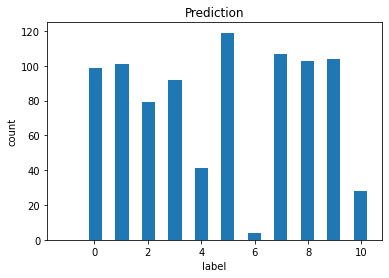

In [11]:
y_pred = scClass.predict(dataset.test_x,model)

total acc: 93.5005701254276 %


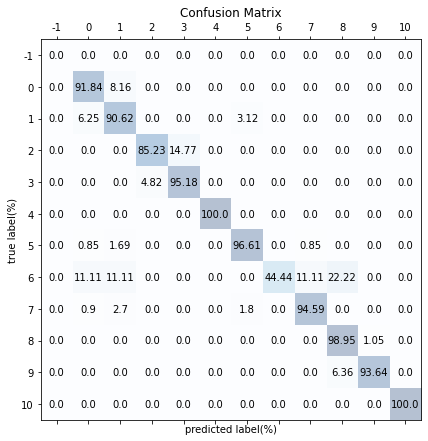

In [12]:
scClass.confusion_matrix(y_pred,np.array(dataset.test_y),filter=True)

In [13]:
scClass.plot_performance(y_pred,np.array(dataset.test_y))

,Performance,Value
0,accuary,0.935006
1,precision,0.901002
2,recall,0.947349
3,f1-score,0.913713


## Classify

filter type_id=-1 cell:  91789  -> 91789  cells
normalizing data


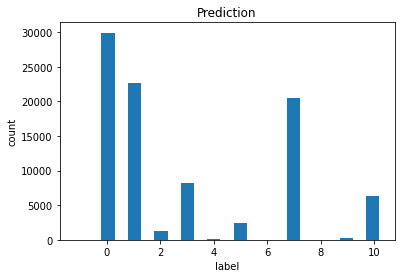

In [14]:
adata = sc.read_h5ad("../dataset/PBMC68k_modelC.h5ad")
adata = scClass.pp.preprocess(adata,filter=True,random=False,normalize=True)
y_pred = scClass.predict(adata,model)

total acc: 64.51644532569262 %


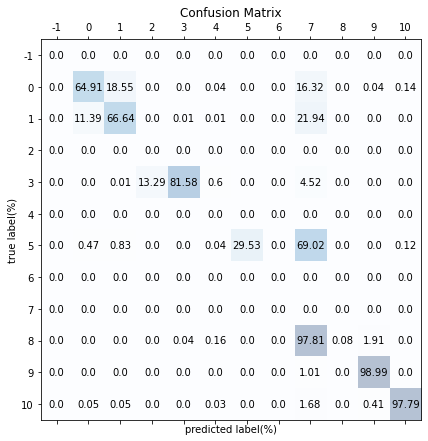

In [15]:
y_true = adata.obs['modelC id'].values 
scClass.confusion_matrix(y_pred=y_pred,y_true=y_true)

In [16]:
y_pred[y_pred==2] = 3 #B cell
scClass.plot_performance(y_pred,y_true)

/home/shhsu/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Performance,Value
0,accuary,0.659763
1,precision,0.646849
2,recall,0.867201
3,f1-score,0.644396
